In [ ]:
# Scenario-Based Question
# A university wants to build a predictive model to estimate
#  student grades based on four factors:
# - Study hours per week
# - Attendance percentage
# - Previous exam score
# - Average sleep hours
# They collect data from 200 students and decide to use Ridge
#  Regression for prediction. To evaluate the model, they apply different cross-validation strategies:
# - Basic K-Fold CV (5 folds, shuffled) to check the stability of the model’s R² scores.
# - Multi-metric evaluation using both R² and Mean Squared Error (MSE), comparing training and validation
# scores.
# - Stratified K-Fold CV (for a separate classification task predicting pass/fail using LogisticRegression).

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np

X,y=make_regression(n_samples=1000,n_features=5,noise=15,random_state=42)

model=LinearRegression()

kf=KFold(n_splits=5,shuffle=True,random_state=42)

scores=cross_val_score(model , X, y, cv=kf, scoring='r2')

print("R^2 scores for each fold:", scores.round(3))
print("Mean R^2:", scores.mean().round(3))
print("Std Dev:", scores.std().round(3))

if scores.std() < 0.05:
  print("Model is stable across folds.")
else:
  print("Modeel performance varies across folds")

R^2 scores for each fold: [0.937 0.945 0.945 0.947 0.947]
Mean R^2: 0.944
Std Dev: 0.004
Model is stable across folds.


In [ ]:
# Scenario: Predicting Patient Recovery Time
# A hospital research team wants to build a model to predict patient recovery time (in days) after
#  surgery based on several factors such as:
# - Age of the patient
# - Number of hours of post-surgery physiotherapy per week
# - Pre-existing health conditions (numeric severity score)
# - Length of hospital stay (days)
# - Average sleep hours during recovery
# They collect data from 1,000 patients and decide to use Linear Regression.
# To evaluate the model, they apply 5-Fold Cross-Validation with R² as the performance metric.

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np

X,y=make_regression(n_samples=1000,n_features=5,noise=15,random_state=42)

model=LinearRegression()

kf=KFold(n_splits=5,shuffle=True,random_state=42)

scores=cross_val_score(model , X, y, cv=kf, scoring='r2')

print("R^2 scores for each fold:", scores.round(3))
print("Mean R^2:", scores.mean().round(3))
print("Std Dev:", scores.std().round(3))

if scores.std() < 0.05:
  print("Model is stable across folds.")
else:
  print("Modeel performance varies across folds")





R^2 scores for each fold: [0.937 0.945 0.945 0.947 0.947]
Mean R^2: 0.944
Std Dev: 0.004
Model is stable across folds.


In [ ]:
# Scenario: Predicting Student Exam Performance
# A university research team wants to build a model to predict student exam scores (out of 100) based on several factors such as:
# - Number of study hours per week
# - Attendance percentage in lectures
# - Prior GPA (Grade Point Average)
# - Participation in group projects (numeric engagement score)
# - Average sleep hours during exam preparation
# They collect data from 800 students across different departments and decide to use Linear Regression.
# To evaluate the model, they apply 5-Fold Cross-Validation with R² as the performance metric.

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np


X, y = make_regression(n_samples=800,
                       n_features=5,
                       noise=15,
                       random_state=42)

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("R^2 scores for each fold:", scores.round(3))
print("Mean R^2:", scores.mean().round(3))
print("Std Dev:", scores.std().round(3))

if scores.std() < 0.05:
    print("Model is stable across folds.")
else:
    print("Model performance varies across folds.")


R^2 scores for each fold: [0.987 0.988 0.989 0.988 0.988]
Mean R^2: 0.988
Std Dev: 0.001
Model is stable across folds.


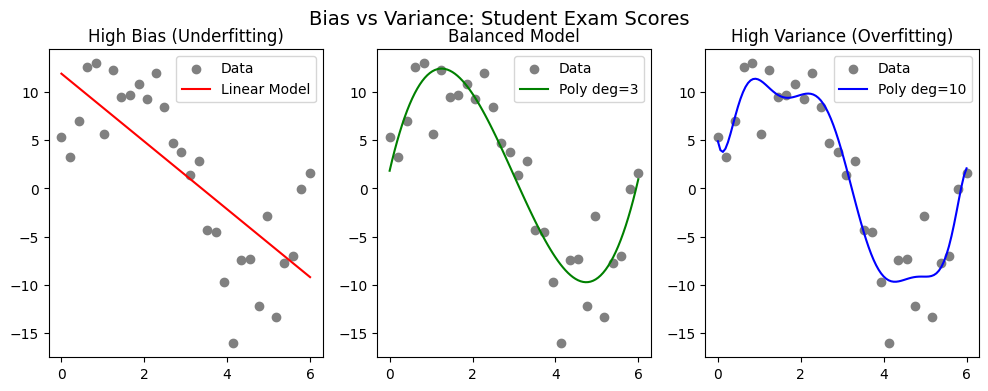

In [ ]:
# Scenario: Predicting Student Exam Scores
# A school wants to build a model to predict student exam scores based on study hours. They collect data
# from 30 students, but the scores are noisy because of other factors (like sleep, stress, or health).
# They try two different models:
# - Linear Model (straight line) → very simple, assumes scores increase perfectly with study hours.
# - Polynomial Model (degree 10 curve) → very complex, tries to follow every bump in the data.

# Questions
# - Part A: If the linear model consistently predicts too low or too high compared to actual scores,
# what does this show about bias?
# - Part B: If the polynomial model fits the training data almost perfectly but gives very different predictions when tested on new students, what does this show about variance?
# - Part C: Which model is likely to generalize better to new students, and why?
# - Part D (Applied): How would you explain the difference between “high bias” and “high variance” to
#  a teacher who doesn’t know machine learning?

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(0)
X=np.linspace(0,6,30).reshape(-1,1)
y=(10*np.sin(X).ravel()+np.random.normal(scale=3,size=30))

linear_model=make_pipeline(PolynomialFeatures(1),LinearRegression()) #simple line
poly_model=make_pipeline(PolynomialFeatures(10),LinearRegression()) #ccomplex curve
balanced_model=make_pipeline(PolynomialFeatures(3),LinearRegression()) #just right

linear_model.fit(X,y)
poly_model.fit(X,y)
balanced_model.fit(X,y)

X_test = np.linspace(0, 6, 100).reshape(-1, 1)
y_linear   = linear_model.predict(X_test)
y_poly     = poly_model.predict(X_test)
y_balanced = balanced_model.predict(X_test)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X, y, color="gray", label="Data")
plt.plot(X_test, y_linear, color="red", label="Linear Model")
plt.title("High Bias (Underfitting)")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X, y, color="gray", label="Data")
plt.plot(X_test, y_balanced, color="green", label="Poly deg=3")
plt.title("Balanced Model")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X, y, color="gray", label="Data")
plt.plot(X_test, y_poly, color="blue", label="Poly deg=10")
plt.title("High Variance (Overfitting)")
plt.legend()

plt.suptitle("Bias vs Variance: Student Exam Scores", fontsize=14)
plt.show()





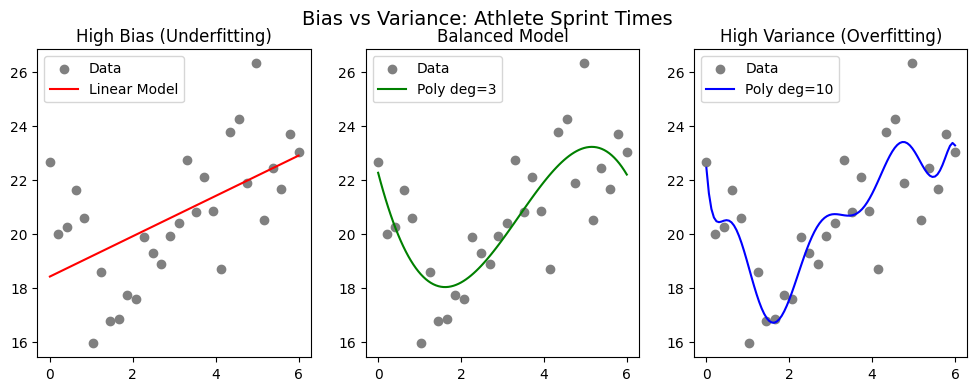

In [ ]:
# Scenario: Predicting Athlete Performance
# A sports academy wants to build a model to predict athlete sprint times (in seconds) based on training
#  hours. They collect data from 30 athletes, but the sprint times are noisy because of other factors (like diet, fatigue, or weather).
# They try two different models:
# - Linear Model (straight line) → very simple, assumes sprint times improve perfectly with more
#  training hours.
# - Polynomial Model (degree 10 curve) → very complex, tries to follow every bump in the data.

# Questions
# - Part A: If the linear model consistently predicts sprint times that are too fast or too slow compared
#  to actual results, what does this show about bias?
# - Part B: If the polynomial model fits the training data almost perfectly but gives very different
# predictions when tested on new athletes, what does this show about variance?
# - Part C: Which model is likely to generalize better to new athletes, and why?
# - Part D (Applied): How would you explain the difference between “high bias” and “high variance”
#  to a coach who doesn’t know machine learning?


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(0)

X = np.linspace(0, 6, 30).reshape(-1, 1)

y = (20-3*np.sin(X).ravel()) + np.random.normal(scale=1.5, size=30)

linear_model = make_pipeline(PolynomialFeatures(1), LinearRegression())  # simple line
poly_model = make_pipeline(PolynomialFeatures(10), LinearRegression())  # complex curve
balanced_model = make_pipeline(PolynomialFeatures(3), LinearRegression())  # just right

linear_model.fit(X, y)
poly_model.fit(X, y)
balanced_model.fit(X, y)

X_test = np.linspace(0, 6, 100).reshape(-1, 1)
y_linear = linear_model.predict(X_test)
y_poly = poly_model.predict(X_test)
y_balanced = balanced_model.predict(X_test)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X, y, color="gray", label="Data")
plt.plot(X_test, y_linear, color="red", label="Linear Model")
plt.title("High Bias (Underfitting)")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X, y, color="gray", label="Data")
plt.plot(X_test, y_balanced, color="green", label="Poly deg=3")
plt.title("Balanced Model")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X, y, color="gray", label="Data")
plt.plot(X_test, y_poly, color="blue", label="Poly deg=10")
plt.title("High Variance (Overfitting)")
plt.legend()

plt.suptitle("Bias vs Variance: Athlete Sprint Times", fontsize=14)
plt.show()


In [3]:
# Scenario: Package Delivery System
# A logistics company wants to build a machine learning model to optimize package delivery.
# They collect data about each package, including:
# - Size: Small, Medium, Large
# - Priority: Low, Medium, High
# Since machine learning models work with numbers (not text labels), the company decides to use Label
#  Encoding to convert these categories into numeric values.
# They apply Scikit-learn’s LabelEncoder to both features:
# - Size → converted into numeric codes (e.g., Small = 2, Medium = 1, Large = 0)
# - Priority → converted into numeric codes (e.g., Low = 1, Medium = 2, High = 0)
# They also check the mapping and decode the numbers back to the original labels to ensure correctness.

# Questions for Learners
# Part A: Why does the company need to convert categorical values like Small, Medium, Large into numbers
# before training a model?
# Part B: If the encoded values are 0, 1, 2, does the order (e.g., Large = 0, Medium = 1, Small = 2)
# matter for all models? Why or why not?
# Part C: How can the company decode the numeric values back into the original labels after prediction?
# Part D (Applied): Suppose the company adds a new category “Extra Large.” How would LabelEncoder handle
# this, and what challenge might arise if the model was already trained?

import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.DataFrame({
    'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small'],
    'Priority': ['Low', 'High', 'Medium', 'Low', 'High']
})

le_size=LabelEncoder()
data['Size_Encoded']=le_size.fit_transform(data['Size'])

le_priority=LabelEncoder()
data['Priority_Encoded']=le_priority.fit_transform(data['Priority'])

print("Size mapping:", dict(zip(le_size.classes_,le_size.transform(le_size.classes_))))
print("Priority mapping:", dict(zip(le_priority.classes_,le_priority.transform(le_priority.classes_))))

decoded_size=le_size.inverse_transform([0,1,2])
print("Decoded Size:", decoded_size)
decoded_priority=le_priority.inverse_transform([0,1,2])
print("Decoded Priority:", decoded_priority)


print("\nEncoded DataFrame:")
print(data)

Size mapping: {'Large': np.int64(0), 'Medium': np.int64(1), 'Small': np.int64(2)}
Priority mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
Decoded Size: ['Large' 'Medium' 'Small']

Encoded DataFrame:
     Size Priority  Size_Encoded  Priority_Encoded
0   Small      Low             2                 1
1  Medium     High             1                 0
2   Large   Medium             0                 2
3  Medium      Low             1                 1
4   Small     High             2                 0


In [4]:
# Scenario: Restaurant Ordering System
# A restaurant wants to build a machine learning model to predict order preparation time.
# They collect data about each order, including:
# - Meal Type: Breakfast, Lunch, Dinner
# - Spice Level: Mild, Medium, Hot
# Since models can’t directly work with text labels, the restaurant uses Label Encoding to
# convert these categories into numbers.

import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.DataFrame({
    'Meal_Type': ['Breakfast', 'Lunch', 'Dinner', 'Lunch', 'Breakfast', 'Dinner'],
    'Spice_Level': ['Mild', 'Medium', 'Hot', 'Hot', 'Mild', 'Medium']
})

le_meal = LabelEncoder()
data['Meal_Type_Encoded'] = le_meal.fit_transform(data['Meal_Type'])

le_spice = LabelEncoder()
data['Spice_Level_Encoded'] = le_spice.fit_transform(data['Spice_Level'])

print("Meal Type mapping:", dict(zip(le_meal.classes_, le_meal.transform(le_meal.classes_))))
print("Spice Level mapping:", dict(zip(le_spice.classes_, le_spice.transform(le_spice.classes_))))

decoded_meal = le_meal.inverse_transform([0, 1, 2])
print("Decoded Meal Types:", decoded_meal)

decoded_spice = le_spice.inverse_transform([0, 1, 2])
print("Decoded Spice Levels:", decoded_spice)

print("\nEncoded DataFrame:")
print(data)


Meal Type mapping: {'Breakfast': np.int64(0), 'Dinner': np.int64(1), 'Lunch': np.int64(2)}
Spice Level mapping: {'Hot': np.int64(0), 'Medium': np.int64(1), 'Mild': np.int64(2)}
Decoded Meal Types: ['Breakfast' 'Dinner' 'Lunch']
Decoded Spice Levels: ['Hot' 'Medium' 'Mild']

Encoded DataFrame:
   Meal_Type Spice_Level  Meal_Type_Encoded  Spice_Level_Encoded
0  Breakfast        Mild                  0                    2
1      Lunch      Medium                  2                    1
2     Dinner         Hot                  1                    0
3      Lunch         Hot                  2                    0
4  Breakfast        Mild                  0                    2
5     Dinner      Medium                  1                    1


In [5]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

data = pd.DataFrame({
    'Education': ['Bachelor', 'PhD', 'Master', 'High School'],
    'Satisfaction': ['Good', 'Excellent', 'Poor', 'Average']
})

education_order = ['High School', 'Bachelor', 'Master', 'PhD']
satisfaction_order = ['Poor', 'Average', 'Good', 'Excellent']

edu_encoder = OrdinalEncoder(categories=[education_order])
data['Education_Encoded'] = edu_encoder.fit_transform(data[['Education']])

sat_encoder = OrdinalEncoder(categories=[satisfaction_order])
data['Satisfaction_Encoded'] = sat_encoder.fit_transform(data[['Satisfaction']])


education_map = {
    'High School': 0,
    'Bachelor': 1,
    'Master': 2,
    'PhD': 3
}

satisfaction_map = {
    'Poor': 0,
    'Average': 1,
    'Good': 2,
    'Excellent': 3
}

data['Education_Manual'] = data['Education'].map(education_map)
data['Satisfaction_Manual'] = data['Satisfaction'].map(satisfaction_map)

print(data)






     Education Satisfaction  Education_Encoded  Satisfaction_Encoded  \
0     Bachelor         Good                1.0                   2.0   
1          PhD    Excellent                3.0                   3.0   
2       Master         Poor                2.0                   0.0   
3  High School      Average                0.0                   1.0   

   Education_Manual  Satisfaction_Manual  
0                 1                    2  
1                 3                    3  
2                 2                    0  
3                 0                    1  


In [6]:
# Scenario: Patient Health Monitoring
# A hospital wants to analyze patient records to understand how disease severity and recovery
# satisfaction affect treatment outcomes.
# They collect data such as:
# - Disease Severity: Mild, Moderate, Severe, Critical
# - Recovery Satisfaction: Poor, Average, Good, Excellent
# Since these categories have a natural order (e.g., Critical is worse than Mild, Excellent is
# better than Poor), the hospital uses Ordinal Encoding to convert them into numbers that respect this
#  ranking.
# They define custom ordering:
# - Disease Severity → Mild (0), Moderate (1), Severe (2), Critical (3)
# - Recovery Satisfaction → Poor (0), Average (1), Good (2), Excellent (3)
# They also compare this with a manual dictionary mapping to ensure consistency.

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

data = pd.DataFrame({
    'Disease_Severity': ['Mild', 'Severe', 'Critical', 'Moderate'],
    'Recovery_Satisfaction': ['Good', 'Poor', 'Excellent', 'Average']
})

severity_order = ['Mild', 'Moderate', 'Severe', 'Critical']
satisfaction_order = ['Poor', 'Average', 'Good', 'Excellent']

severity_encoder = OrdinalEncoder(categories=[severity_order])
data['Severity_Encoded'] = severity_encoder.fit_transform(data[['Disease_Severity']])

satisfaction_encoder = OrdinalEncoder(categories=[satisfaction_order])
data['Satisfaction_Encoded'] = satisfaction_encoder.fit_transform(data[['Recovery_Satisfaction']])

severity_map = {
    'Mild': 0,
    'Moderate': 1,
    'Severe': 2,
    'Critical': 3
}

satisfaction_map = {
    'Poor': 0,
    'Average': 1,
    'Good': 2,
    'Excellent': 3
}

data['Severity_Manual'] = data['Disease_Severity'].map(severity_map)
data['Satisfaction_Manual'] = data['Recovery_Satisfaction'].map(satisfaction_map)

print(data)


  Disease_Severity Recovery_Satisfaction  Severity_Encoded  \
0             Mild                  Good               0.0   
1           Severe                  Poor               2.0   
2         Critical             Excellent               3.0   
3         Moderate               Average               1.0   

   Satisfaction_Encoded  Severity_Manual  Satisfaction_Manual  
0                   2.0                0                    2  
1                   0.0                2                    0  
2                   3.0                3                    3  
3                   1.0                1                    1  


In [8]:
# Scenario: Online Food Delivery App
# An online food delivery company wants to build a machine learning model to predict delivery time based
#  on the type of cuisine ordered.
# They collect data such as:
# - Cuisine Type: Italian, Chinese, Indian, Mexican
# Since machine learning models can’t directly work with text labels, the company decides to use One-Hot
#  Encoding.
# This method creates a new column for each cuisine type:
# - Italian → [1, 0, 0, 0]
# - Chinese → [0, 1, 0, 0]
# - Indian → [0, 0, 1, 0]
# - Mexican → [0, 0, 0, 1]
# They set sparse=False so the encoder returns a regular NumPy array instead of a sparse matrix, making
#  the results easier to read and print for analysis.

# Questions for Learners
# Part A: Why is One-Hot Encoding more appropriate than Label Encoding for categories like cuisine type?
# Part B: What does sparse=False do, and why might it be useful in this scenario?
# Part C: If the company adds a new cuisine type (e.g., “Thai”), how will One-Hot Encoding handle it?
# Part D (Applied): What potential problem could arise if the company has hundreds of cuisine types, and
#  how might they solve it?


import pandas as pd
from sklearn.preprocessing import OneHotEncoder

orders=pd.DataFrame({
    'Cuisine': ['Italian','Chinese','Indian','Mexican','Chinese','Italian']
})

encoder=OneHotEncoder(sparse_output=False)
encoded_array=encoder.fit_transform(orders[['Cuisine']])

encoded_df=pd.DataFrame(encoded_array, columns=encoder.categories_[0])

final_data=pd.concat([orders,encoded_df], axis=1)

print("Cuisine categories:",encoder.categories_)
print("\nEncoded Array:\n",encoded_array)
print("\nFinal Encoded DataFrame:")
print(final_data)

Cuisine categories: [array(['Chinese', 'Indian', 'Italian', 'Mexican'], dtype=object)]

Encoded Array:
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

Final Encoded DataFrame:
   Cuisine  Chinese  Indian  Italian  Mexican
0  Italian      0.0     0.0      1.0      0.0
1  Chinese      1.0     0.0      0.0      0.0
2   Indian      0.0     1.0      0.0      0.0
3  Mexican      0.0     0.0      0.0      1.0
4  Chinese      1.0     0.0      0.0      0.0
5  Italian      0.0     0.0      1.0      0.0
